# ***Report on Predictive Heart Disease Model*** 

# ***Introduction***

Heart disease is characterized by cholesterol plaques that fill and narrow the arteries, preventing normal blood flow (Mayo Foundation for Medical Education and Research, 2022). This is especially important to consider as cardiovascular diseases are a leading cause of death around the world (World Health Organization, 2021). It is an important illness to consider as it is a leading cause of death. This is an important With the help of data science tools and algorithms, we will attempt to classify whether or not someone has heart disease through some common factors.

The question we will try to answer is: _Given a number of factors that affect the human heart, can we predict whether or not an individual has heart disease?_ The [dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease) we chose is the `processed.cleveland.data` dataset from the UCI Machine Learning Repository (Janosi et al., 1988). The [dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease) is provided from the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation and it contains the 14 attributes listed below.

- Age (age): age in years
- Sex (sex):
    - Value 0: Female
    - Value 1: Male
- Chest Pain Type (cp):
    - Value 1: Typical angina
    - Value 2: Atypical angina
    - Value 3: Non-anginal pain
    - Value 4: Asymptomatic
- Resting Blood Pressure (trestbps):  measured in mm/Hg on admission to the hospital
- [Serum Cholesterol](https://www.medicalnewstoday.com/articles/316190#summary) (chol): measured in mg/dl
- Fasting blood sugar > 120 mg/dl (fbs):
    - Value 1: True
    - Value 2: False
- Resting electrocardiographic results (restecg):
    - Value 0: Normal
    - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- Maximum heart rate achieved in bpm (thalach)
- [Exercise induced angina](https://www.ahajournals.org/doi/10.1161/01.CIR.0000060545.09308.F5#:~:text=Warm%2Dup%20angina%20is%20a,even%20greater%20level%20of%20intensity.) (exang):
    - Value 0: No
    - Value 1: Yes
- ST depression induced by exercise relative to rest (oldpeak)
- The slope of the peak exercise ST segment (slope):
    - Value 1: Upsloping
    - Value 2: Flat
    - Value 3: Downsloping
- Number of major vessels colored by [flourosopy](https://www.cdc.gov/nceh/radiation/fluoroscopy.html#:~:text=Print-,Fluoroscopy,a%20form%20of%20ionizing%20radiation.) (ca): between 0 and 3
- [Thalassemia](https://www.cdc.gov/ncbddd/thalassemia/index.html#:~:text=Thalassemia%20is%20an%20inherited%20(i.e.,blood%20transfusions%20and%20chelation%20therapy.) (thal)
    - Value 3: Normal
    - Value 6: Fixed defect
    - Value 7: Reversable defect
- Predicted attribute (num): angiographic diagnosis of heart disease
    - Value 0: False (< 50% diameter narrowing)
    - Values 1-4: True (> 50% diameter narrowing)

# ***Preliminary exploratory data analysis***

#### Loading necessary libraries

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.4     ✔ r

In [2]:
#Read, Clean, and Wrangle Data
cleveland_clean <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                            col_names=c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
                    mutate(if_hd = as.factor(num))|>
                    select(age, chol, trestbps, thalach, oldpeak, if_hd)

cleveland_clean$if_hd <- ifelse(cleveland_clean$if_hd == 0, "No", "Yes")
cleveland_clean$if_hd <- as.factor(cleveland_clean$if_hd)

cleveland_clean

Rows: 303 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,trestbps,thalach,oldpeak,if_hd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,2.3,No
67,286,160,108,1.5,Yes
67,229,120,129,2.6,Yes
37,250,130,187,3.5,No
⋮,⋮,⋮,⋮,⋮,⋮
68,193,144,141,3.4,Yes
57,131,130,115,1.2,Yes
57,236,130,174,0.0,Yes
38,175,138,173,0.0,No


#### Reading and wrangling the data

`processed.cleveland.data` was first loaded from the web using the `read_csv()` function. The column `num` was then mutated to create `if_hd`, and the `ifelse()` function was used to change the values to if the individual has heart disease (`Yes` or `No`). The data was then selected to contain only the numerical predictors (`age`, `chol`, `thalach`, `trestbps`, `oldpeak`) and `if_hd`.

In [3]:
#Split into Training and Testing Sets
set.seed(6969)

data_split <- initial_split(cleveland_clean, prop = 0.80, strata = if_hd)
cleveland_train <- training(data_split)  
cleveland_test <- testing(data_split)

#### Splitting the dataset into training and testing

First, we set a seed using `set.seed()` to create reproducible results because we're using `initial_split()` which splits our dataset "randomly" according to the seed. We created training and testing datasets by splitting the original dataset of **303** observations: **80%** to training and **20%** to testing.

In [4]:
#Find Mean Values
cleveland_mean <- cleveland_train |>
    select(-if_hd) |>
    map_df(mean, na.rm=TRUE) |>
    pivot_longer(cols= age:oldpeak,
                names_to= "predictor", 
                values_to = "mean")

#Find Max Values
cleveland_max <- cleveland_train |>
    select(-if_hd) |>
    map_df(max, na.rm=TRUE)|>
    pivot_longer(cols= age:oldpeak,
                names_to= "predictor", 
                values_to = "max")

#Find Min Values
cleveland_min <- cleveland_train |>
    select(-if_hd) |>
    map_df(min, na.rm=TRUE) |>
    pivot_longer(cols= age:oldpeak,
                names_to= "predictor", 
                values_to = "min")

#Number of NAs
training_count <- count(cleveland_train)
NA_training <- cleveland_train |> 
    na.omit() |>
    count()
na <- training_count - NA_training

colnames(na) <- paste0("NAs")

#How many values have/ don't have heart disease, and total number of data values
cleveland_yesvsno <- cleveland_train |>
    group_by(if_hd) |>
    summarize(n=n())|>
    pivot_wider(names_from = if_hd, values_from = n) |>
    mutate(total_data = Yes + No)

colnames(cleveland_yesvsno) <- paste0(list("with_hd", "without_hd", "total_data"))

#Merging of above data into two tables for easier visualization
cleveland_count <- Reduce(merge, list(cleveland_yesvsno, na))
print("Table 1. Number of Data Points")
cleveland_count

cleveland_mmm <- Reduce(merge, list(cleveland_mean, cleveland_max, cleveland_min))
print("Table 2. Mean Max and Min of each Numerical Predictor")
cleveland_mmm

[1] "Table 1. Number of Data Points"


with_hd,without_hd,total_data,NAs
<int>,<int>,<int>,<int>
131,111,242,0


[1] "Table 2. Mean Max and Min of each Numerical Predictor"


predictor,mean,max,min
<chr>,<dbl>,<dbl>,<dbl>
age,54.623967,77.0,29
chol,246.876033,564.0,126
oldpeak,1.042562,6.2,0
thalach,148.524793,202.0,71
trestbps,132.367769,200.0,94


#### Summarizing the training data
Table 1 was made to indicate how much data, and of what type (with/ without heart disease), we have to fit our model. The data amount could imply the quality of our model, as it indicates what the model will be fit to.

Table 2 contains the mean, maximum, and minimum values for each numerical predictor. This indicates the distribution of each predictor in the dataset.

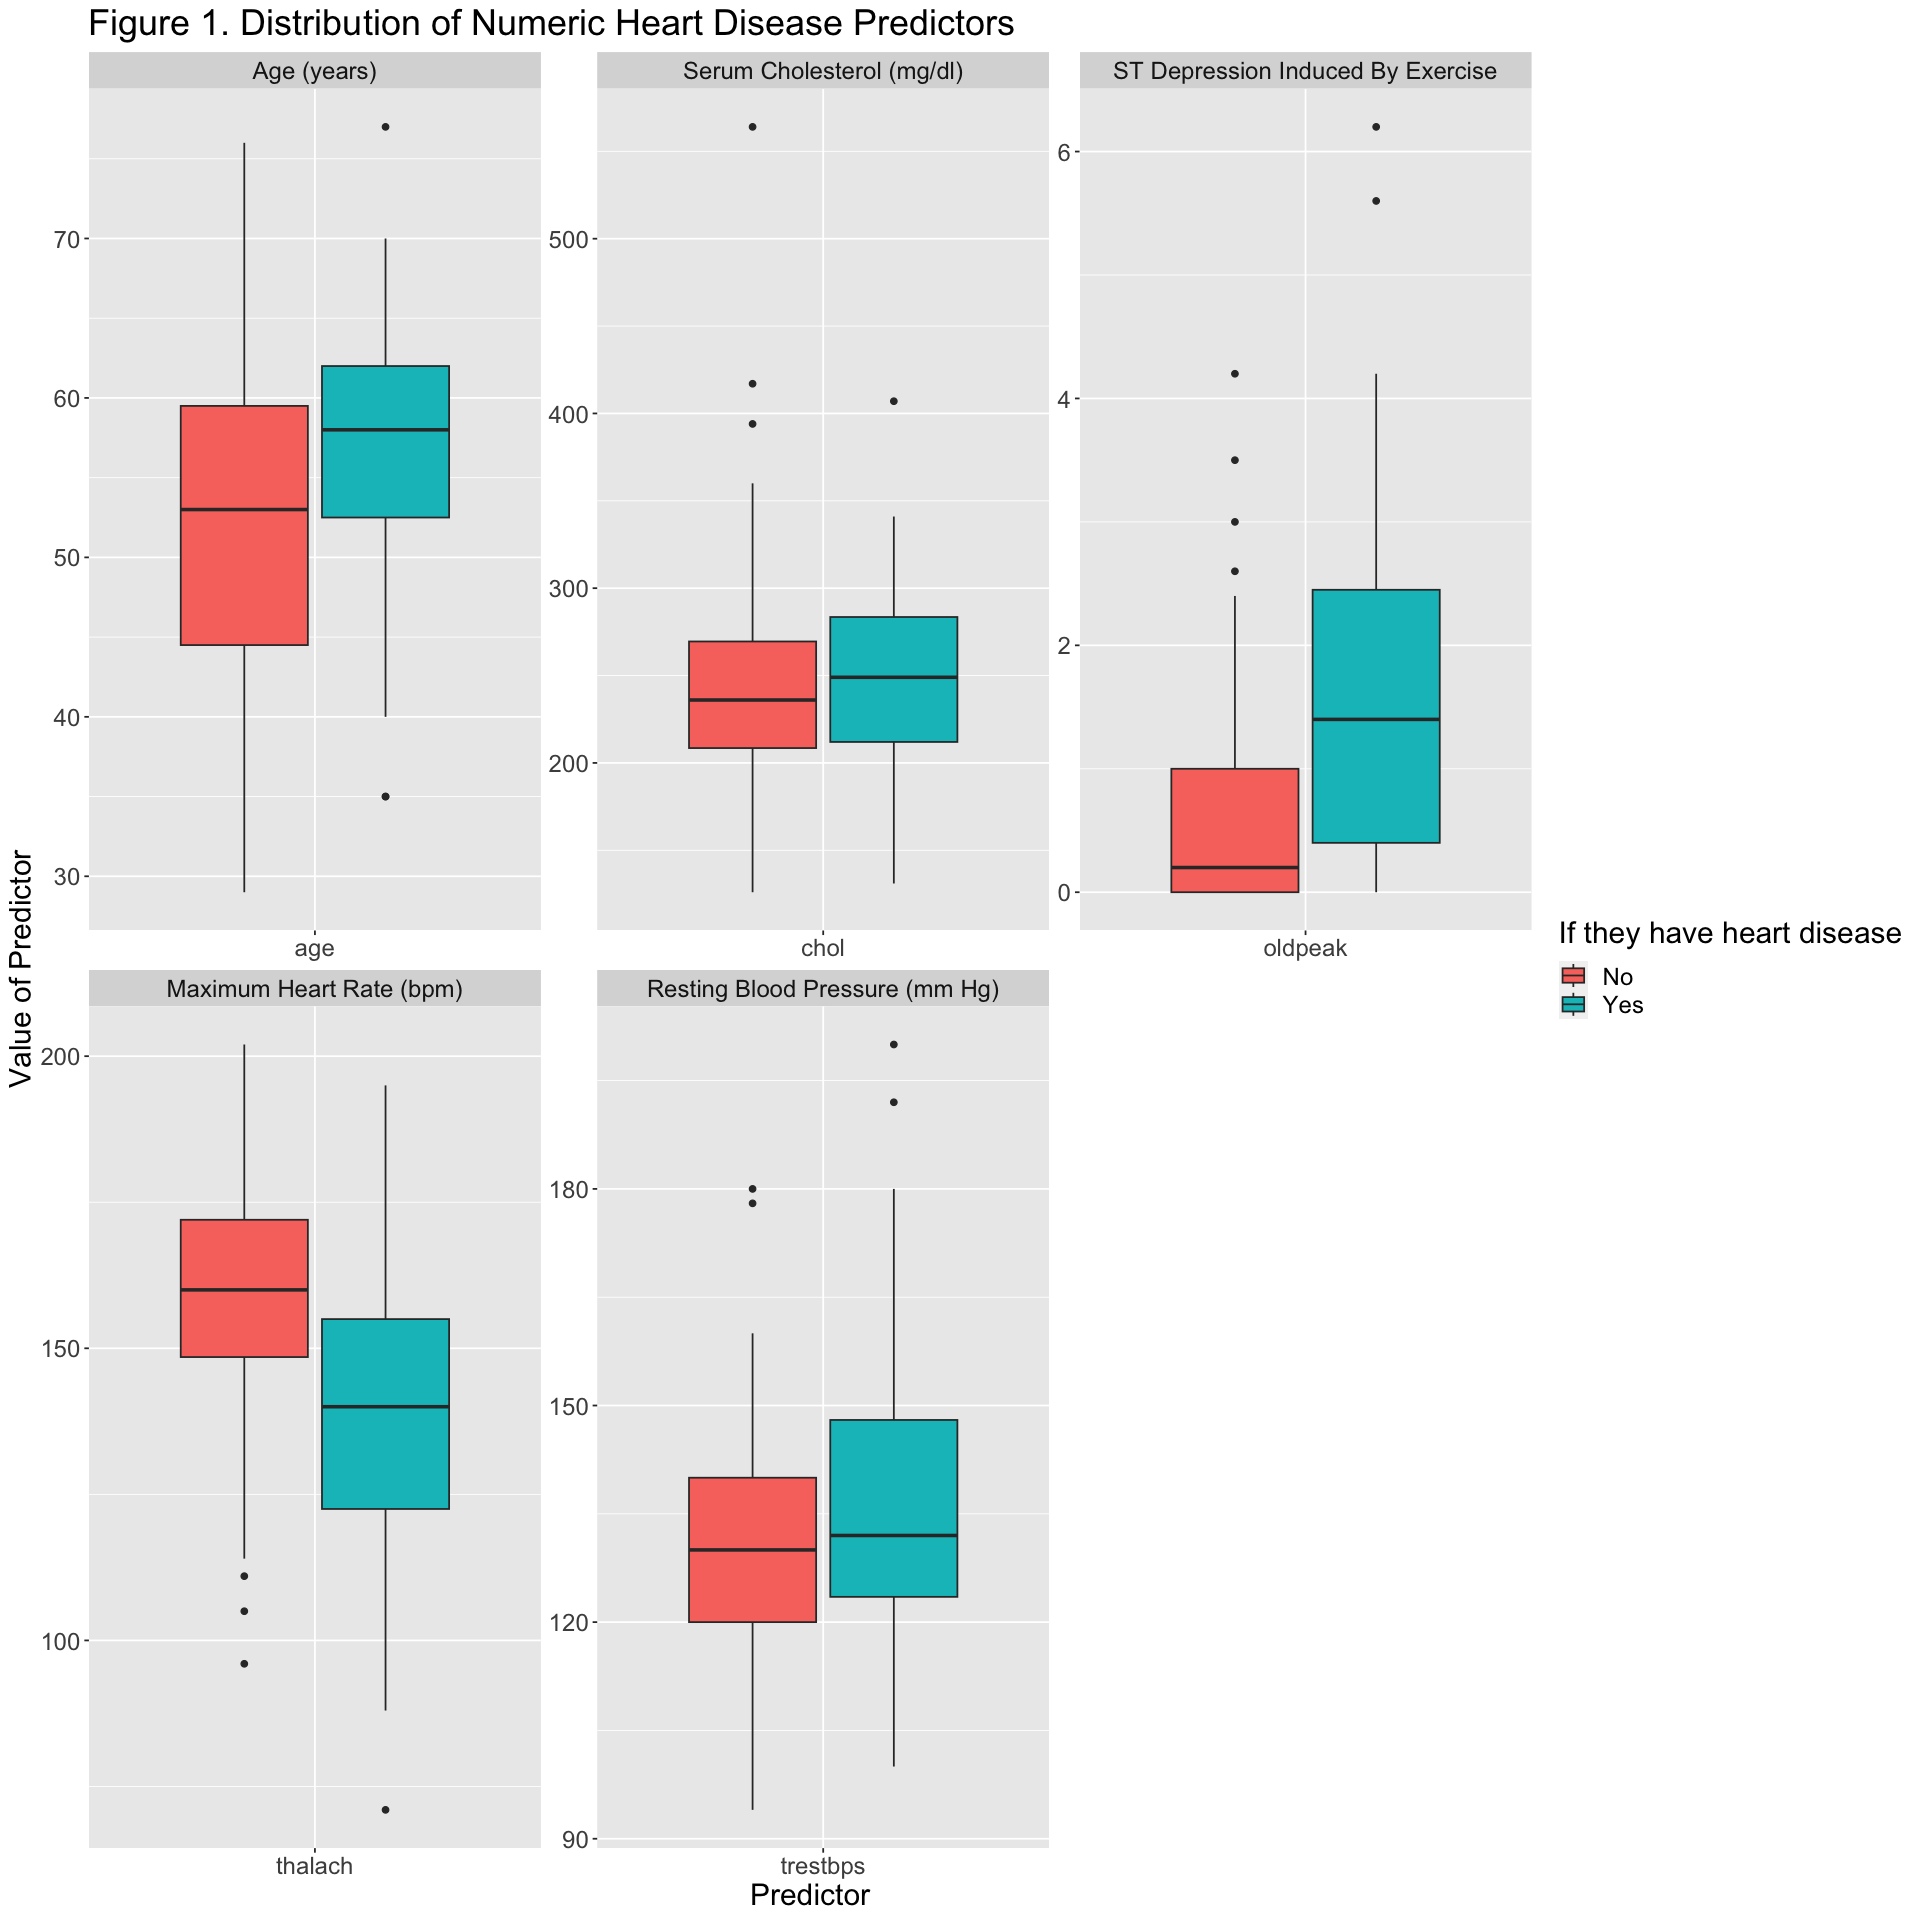

In [5]:
#Set Plot Area
options(repr.plot.width = 16, repr.plot.height = 16)

#Fix data for box facet_wrap
cleveland_box_data <- cleveland_train|> 
    pivot_longer(cols=age:oldpeak, names_to = "parameter", values_to = "value")

#Labels
parameter.labs <- c("Age (years)", "Serum Cholesterol (mg/dl)", "Maximum Heart Rate (bpm)", "Resting Blood Pressure (mm Hg)", "ST Depression Induced By Exercise")
names(parameter.labs) <- c("age", "chol", "thalach", "trestbps", "oldpeak")

#Plot
clev_box <- ggplot(cleveland_box_data, aes(x=parameter, y=value, fill = if_hd)) + 
                geom_boxplot()+
                facet_wrap(parameter ~ ., scale = "free", labeller = labeller(parameter = parameter.labs)) +
                labs(x= "Predictor", y="Value of Predictor", fill = "If they have heart disease") +
                ggtitle("Figure 1. Distribution of Numeric Heart Disease Predictors") +
                theme(text = element_text(size=18))

clev_box

#### Preliminary predictor exploration

The box plots were created to see the distribution and median of each numerical predictor with respect to if an individual has heart disease. 

Through the analysis of the median, it was found that `age`, `thalach`, and `oldpeak` were good predictors; they had medians that differed greatly between individuals with and without heart disease. As well as this, `age` had been left skewed for both individuals with and without heart disease, but moreso for those with. `oldpeak` was greatly right skewed for individuals without heart disease, while having no skew for those with. `thalach` had minimal skew for either group.

It was also found that `chol` and `trestbps` were less good predictors, as their medians differed less drastically. As well as this, `chol` had no skew for either group, while `trestbps` had no skew for individuals without heart disease and a right skew for those with. 

From this, we selected `age`, `thalach`, `oldpeak` as our model predictors. 

# ***Model Creation and Accuracy Testing***

In [6]:
#Picking a value for K
set.seed(6969)
options(repr.plot.width = 18, repr.plot.height = 10)

cleveland_recipe <- recipe(if_hd ~ age + thalach + oldpeak, data = cleveland_train) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

vfold <- vfold_cv(cleveland_train, v = 10, strata = if_hd)

k_vals <- tibble(neighbors = seq(from = 1, to = 12, by = 1))

cleveland_results <- workflow() |>
        add_recipe(cleveland_recipe) |>
        add_model(knn_tune) |>
        tune_grid(resamples = vfold, grid = k_vals) |>
        collect_metrics()

#### Set up for picking a K value

*Recipe*

1. We initialized the `recipe()` function to process the cleveland data. Inside the function, we set the `if_hd` as our target variable, and `age`, `thalach` and `oldpeak` as our predictor variables. Then we scaled all the predictors to make them comparable (mean = 0 and std = 1) by applying `step_scale()` and `step_center()`.

*KNN model*

2. To build the KNN model, we set the `nearest_neighbor()` function to specify the engine and model. We assigned the neighbours `tune()` because we performed cross-validation to find the best k value for our analysis. 

*Cross-validation*

3. To obtain the best possible accuracy estimate without placing a heavy load on the computer, we conducted a 10-fold cross-validation (splitting the training set into 10 evenly-sized chunks and using each as the validation set). In the `vfold_cv()` function, the `cleveland_train` was used, and `if_hd` was assigned to the `strata` argument. We also built a data frame called `k_vals` with different k values (1 to 12) for the tuning purpose in the next step. 

*Workflow*

4. In order to put all the steps performed so far in a single block of code, we applied the `workflow()` function by adding the model and recipe created above. Then, using the `tune_grid()` function, we fit the model to each k value in the `k_vals` data frame to estimate the classifier accuracy. 

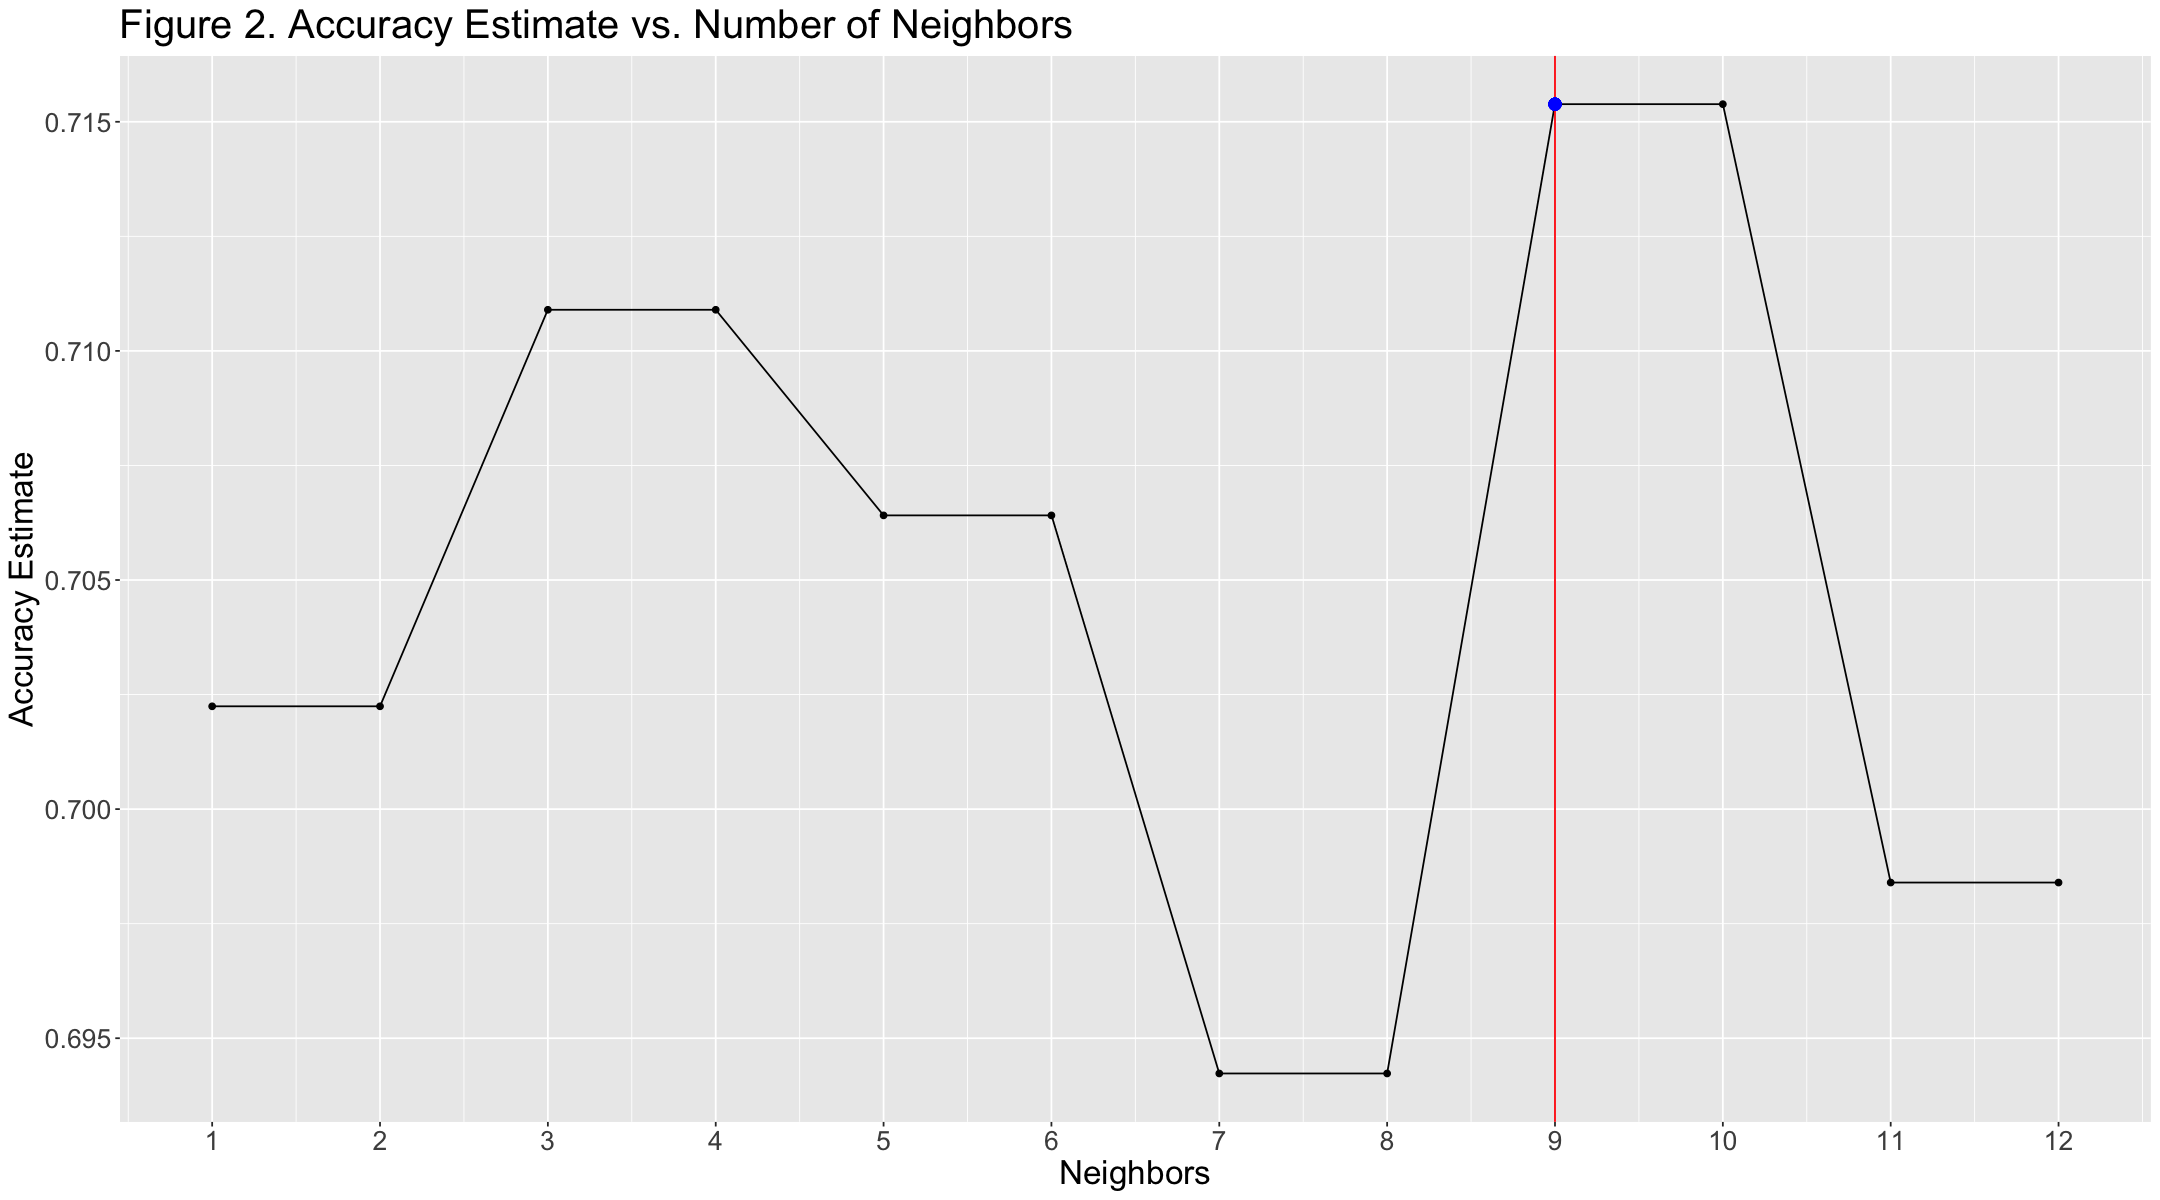

In [7]:
accuracies <- cleveland_results |> 
       filter(.metric == "accuracy")

ky <- accuracies |>
    filter(neighbors == 9) |>
    select(mean) |>
    pull()

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 100, by = 1))+ 
       ggtitle('Figure 2. Accuracy Estimate vs. Number of Neighbors') +
       theme(text = element_text(size=20)) +
       geom_vline(xintercept=9, color = "red") +
       geom_point(aes(x=9, y=ky), color = "blue", size = 3)

cross_val_plot

#### Selecting the Best K

*Plot (Accuracy Estimate vs. Number of Neighbors)*

5. Before creating the plot, we found the estimated accuracy (mean) across the fold using the `collect_metrics()` function and filtering `accuracy` in the `.metric` column. This process provides the `neighbours` (x) and `mean` (y) values, which were then passed to the `ggplot()` function to find the k that produces the highest accuracy. 

6. As shown in *figure 2*, the best k is 9. So, we built the KNN model again by setting the `neighbours = 9`. After putting all the steps in the `workflow()` function with the new model, we assessed the estimated accuracy of our model on the `cleveland_test` data.

In [8]:
#Seeing how well the model predicts the training set
knn_9 <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
        set_engine("kknn") |>
        set_mode("classification")

knn_9_wf <- workflow() |>
        add_recipe(cleveland_recipe) |>
        add_model(knn_9) |>
        fit(data= cleveland_train)

cleveland_predict <- predict(knn_9_wf, cleveland_test) |>
    bind_cols(cleveland_test)

metrics <- cleveland_predict |>
    metrics(truth = if_hd, estimate = .pred_class)|>
    filter(.metric == 'accuracy')

print('Table 3. Accuracy of Model Predicting the Testing Set')
metrics

[1] "Table 3. Accuracy of Model Predicting the Testing Set"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7213115


#### Result of Our Model

*Accuracy*

7. Using the `metrics` and `conf_mat` functions, we output the result of the model evaluation. With **k = 9**, our model has **72.13%** accuracy. That is, *72.13% of the time, the model accurately predicts if a person has heart disease, given the predictor values.* 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


          Truth
Prediction No Yes
       No  28  12
       Yes  5  16

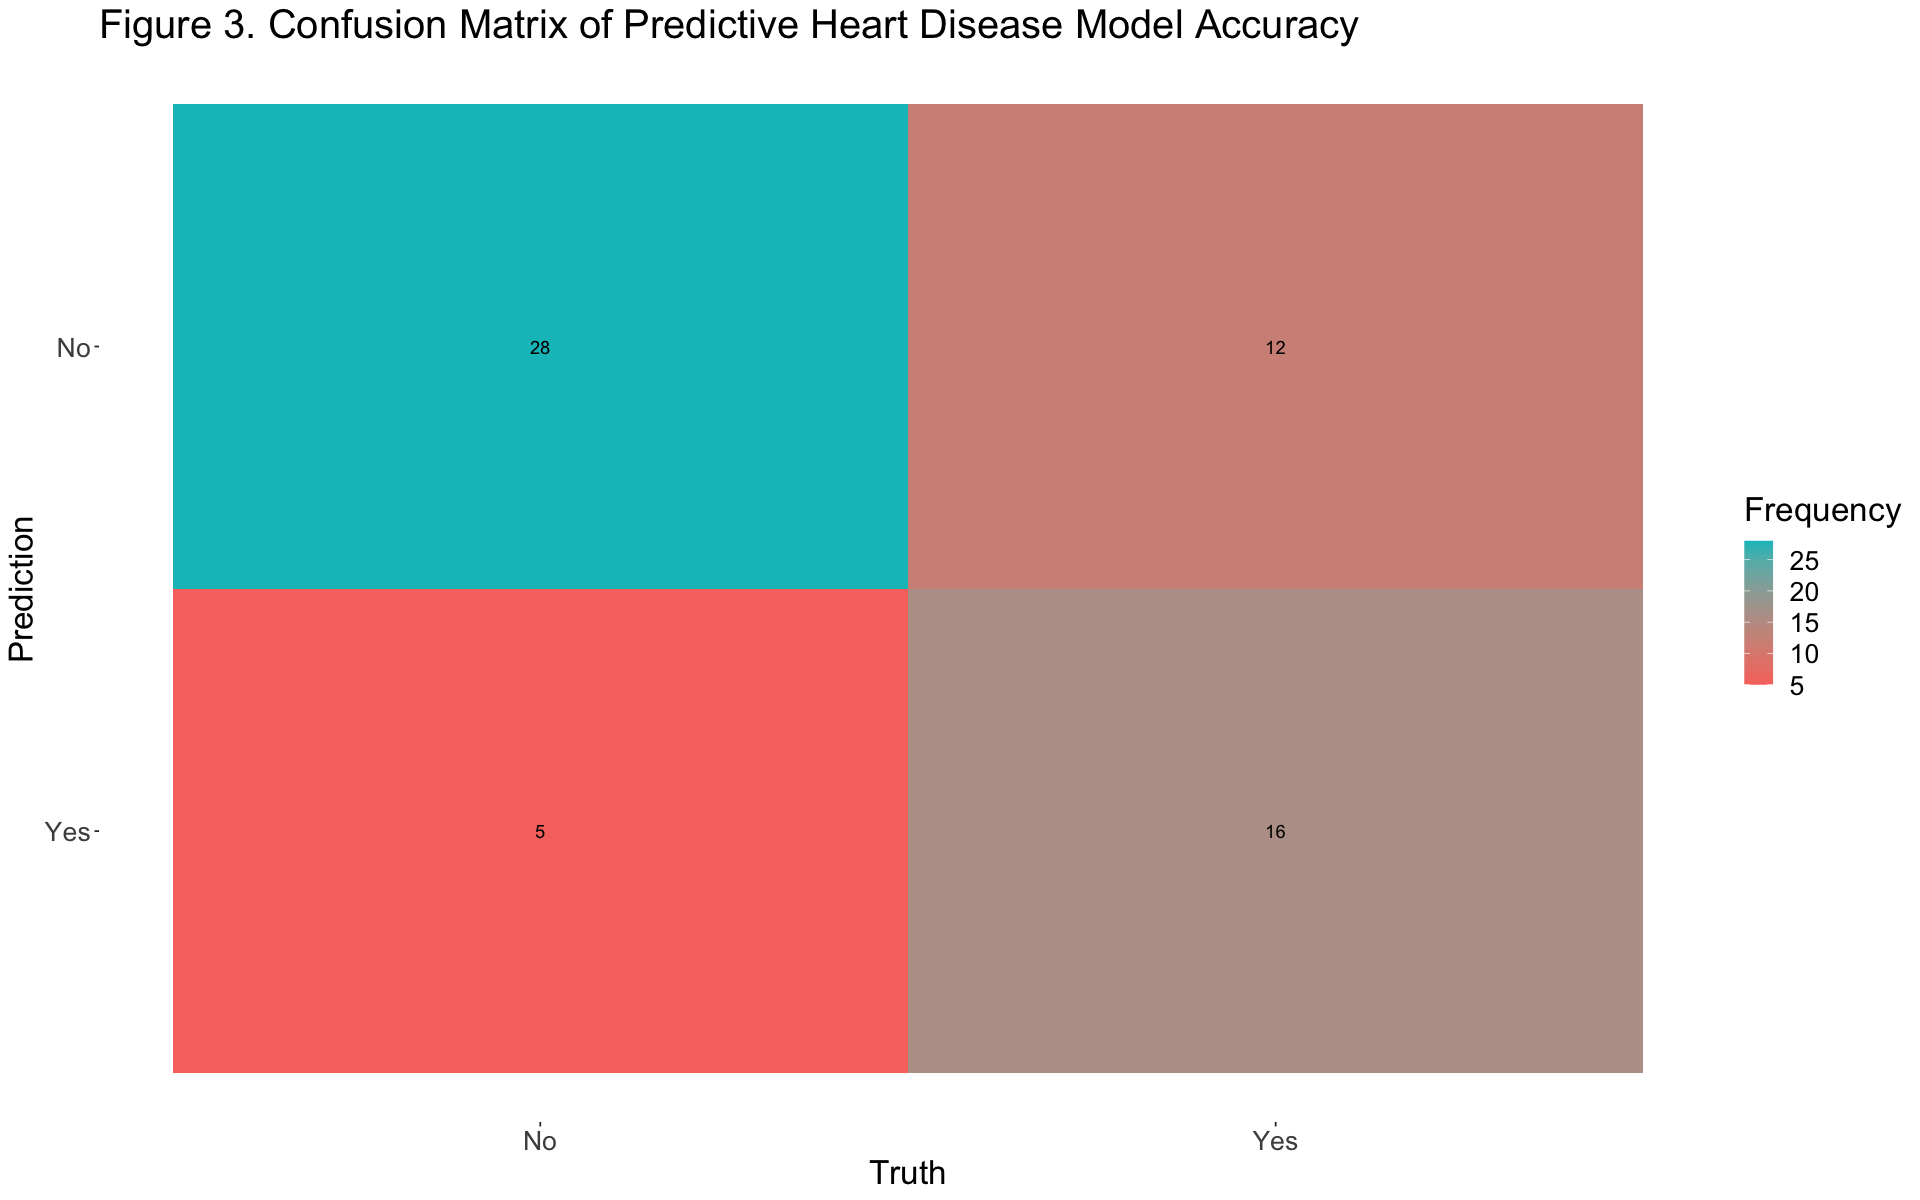

In [9]:
#Confusion Matrix 
options(repr.plot.width = 16, repr.plot.height = 10)

confusion_matrix <- cleveland_predict |> 
                conf_mat(truth = if_hd, estimate = .pred_class) 

confusion_matrix_plot <- autoplot(confusion_matrix, type="heatmap") + 
                labs(title = "Figure 3. Confusion Matrix of Predictive Heart Disease Model Accuracy") + 
                scale_fill_gradient(low = "#F8766D", high = "#00BFC4", name = "Frequency") +
                theme(legend.position = "right", text=element_text(size=20))

confusion_matrix
confusion_matrix_plot

#### Visualization of Model Predictive Capabilities

*Figure 3* is a visual confusion matrix for the classifier `if_hd`. Based on the estimated accuracy of the test data, the 
confusion matrix demonstrates the number of labels (`Yes` heart disease/`No` heart disease) that are predicted correctly
and incorrectly. Here, it shows that **16** observations were correctly predicted as having heart disease and 
**28** observations were correctly predicted as not having heart disease (16 + 28 = 44 correctly predicted labels). On the other 
hand, **5** observations were incorrectly predicted as having heart disease and **12** were incorrectly predicted as not having heart 
disease (5 + 12 = 17 incorrectly predicted labels). This demonstrates a model accuracy of **72.13%**. 

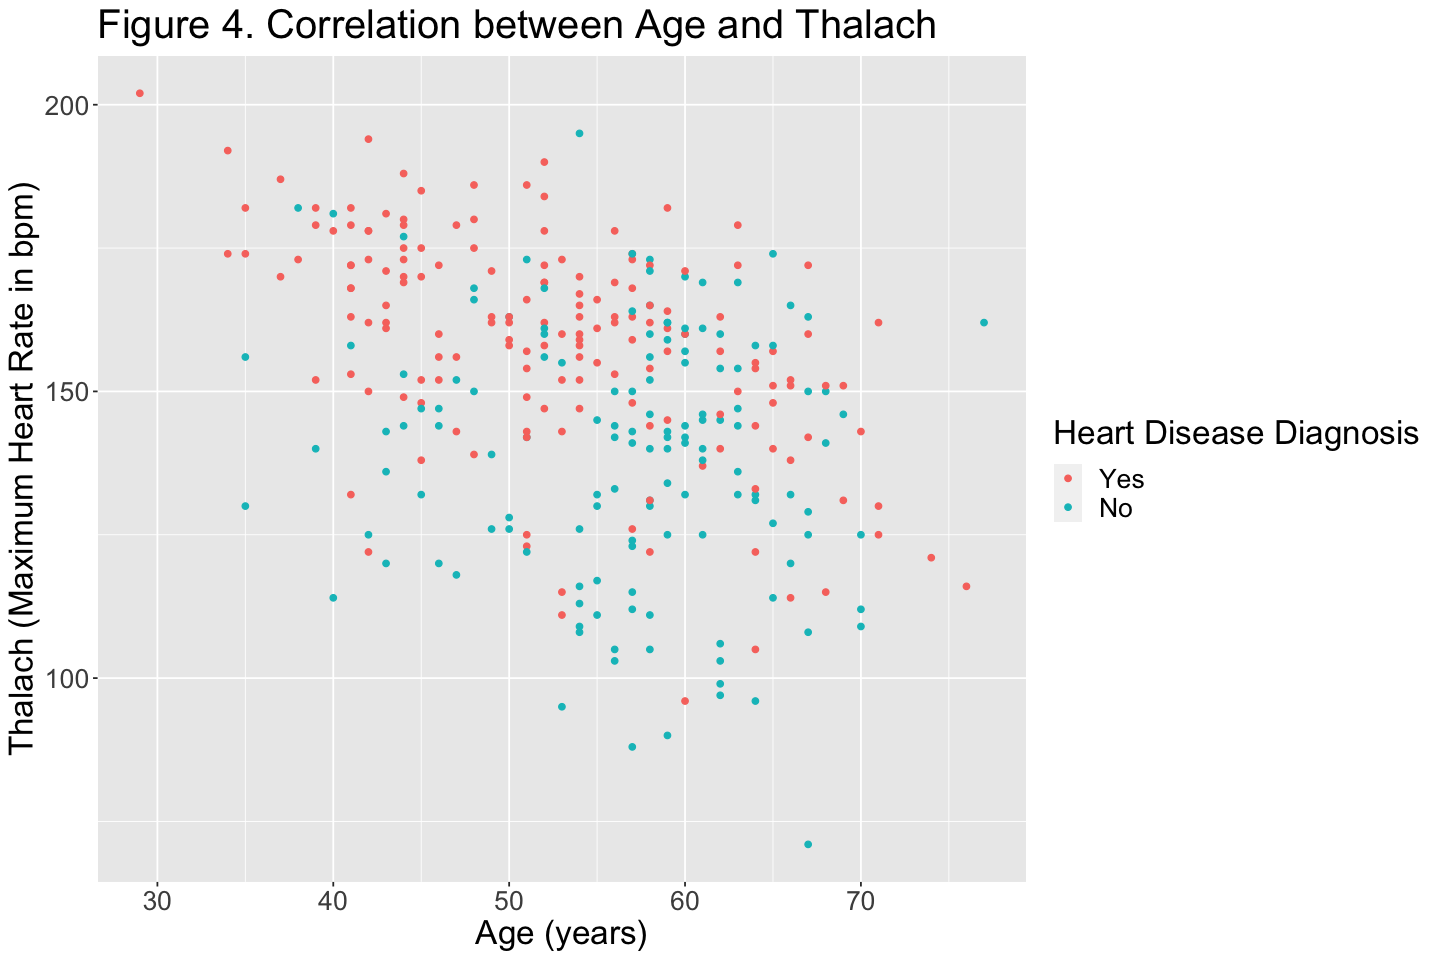

In [10]:
#Final Visualizations
#Set Plot Area 
options(repr.plot.width = 12, repr.plot.height = 8)

#Age VS Thalach 
age_vs_thalach <- cleveland_clean |> 
                    ggplot(aes(x=age, y=thalach, color = if_hd)) + 
                        geom_point(alpha = 1) + 
                        labs(x = "Age (years)", y = "Thalach (Maximum Heart Rate in bpm)", title = "Figure 4. Correlation between Age and Thalach", color = "Heart Disease Diagnosis") +
                        scale_color_manual(labels = c("Yes", "No"), 
                                            values = c("#F8766D", "#00BFC4")) + 
                        theme(text=element_text(size=20))
age_vs_thalach

By looking at the correlation between `thalach` and `age`, there is no strong relationship; all we can say is that the spread is quite small, with points centering around the middle of the plot. When considering the influence that these predictor variables have on heart disease, it is shown that higher `thalach` corresponds to more heart disease diagnoses. As well as this, those aged between 35 and 65 (middle-aged) show more heart disease diagnoses.

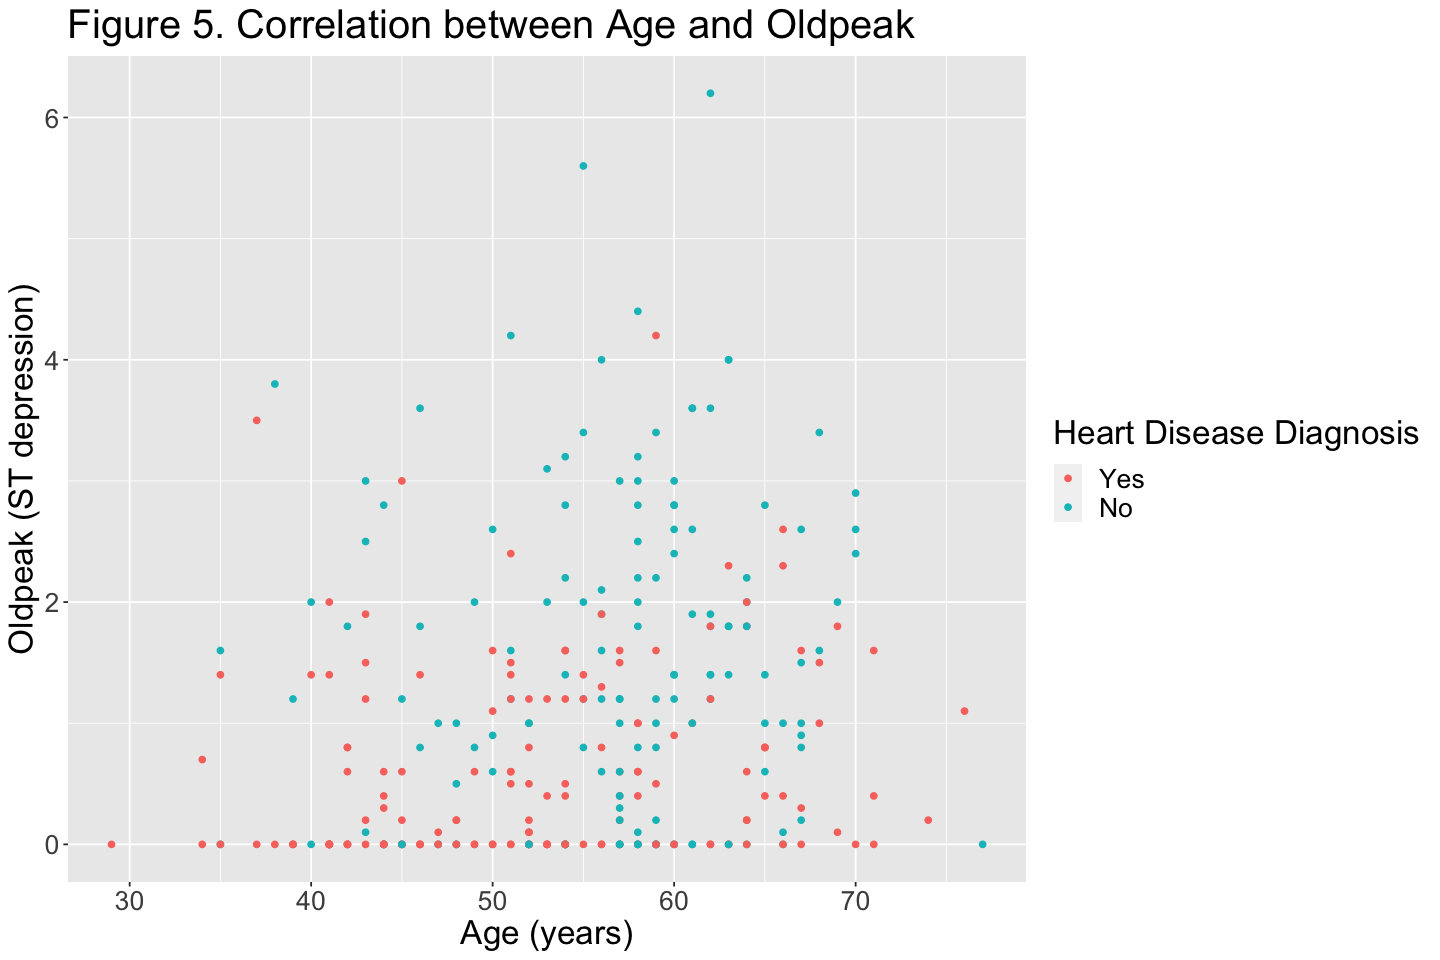

In [11]:
#Age VS Oldpeak 
age_vs_oldpeak <- cleveland_clean |> 
                        ggplot(aes(x=age, y=oldpeak, color=if_hd)) + 
                            geom_point(alpha = 1) + 
                            labs(x = "Age (years)", y = "Oldpeak (ST depression)", title = "Figure 5. Correlation between Age and Oldpeak", color = "Heart Disease Diagnosis") + 
                            scale_color_manual(labels = c("Yes", "No"), 
                                               values = c("#F8766D", "#00BFC4")) + 
                            theme(text=element_text(size=20))
age_vs_oldpeak 

The correlation between `oldpeak` and `age` is weak; the points are fairly clustered together, with `age` having a larger spread than `oldpeak`. We can also see that a lower `oldpeak` correlates to higher heart disease diagnoses, while the positive diagnoses are mainly distributed throughout the ages of approximately 35 to 70. 

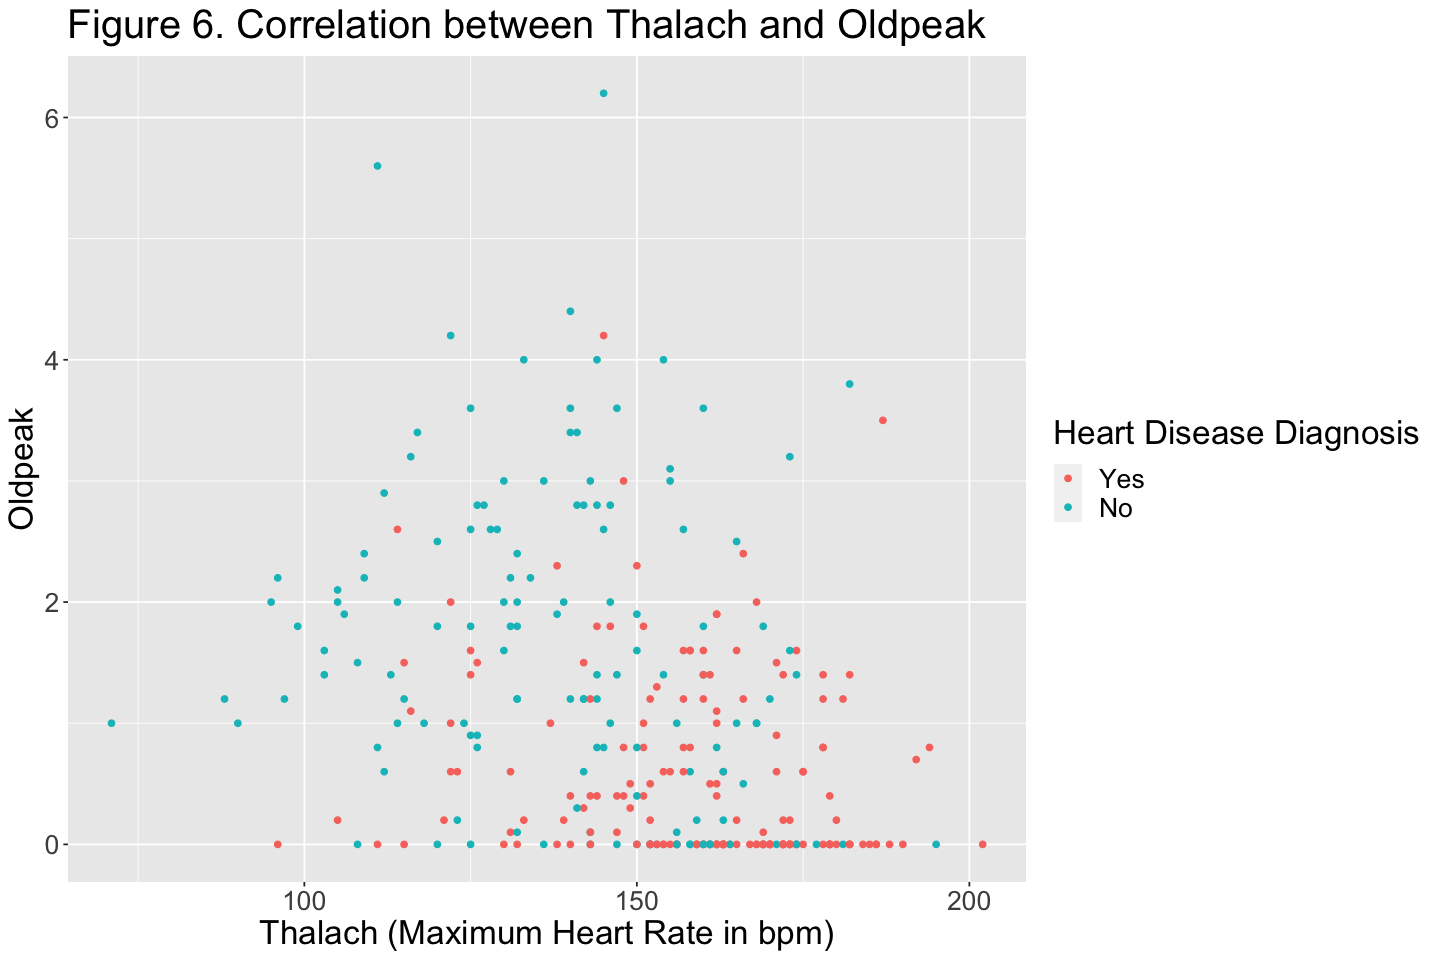

In [12]:
#Thalach VS Oldpeak 
thalach_vs_oldpeak <- cleveland_clean |> 
                            ggplot(aes(x=thalach, y=oldpeak, color = if_hd)) + 
                                geom_point(alpha = 1) + 
                                labs(x = "Thalach (Maximum Heart Rate in bpm)", y = "Oldpeak", title = "Figure 6. Correlation between Thalach and Oldpeak", color = "Heart Disease Diagnosis") + 
                                scale_color_manual(labels = c("Yes", "No"), 
                                                    values = c("#F8766D", "#00BFC4")) + 
                                theme(text=element_text(size=20))
thalach_vs_oldpeak

Although the values of `oldpeak` and `thalach` are somewhat clustered at the bottom middle of the plot above, they are also randomly scattered throughout it; meaning, once again, there is no correlation between these predictors. However, by differentiating the colours, we can see that heart disease is prominent when there is low `oldpeak` and high `thalach`.

# ***Discussion of Findings***

***Summary of Model and Analysis***

To recall the predictive question we were aiming to answer in the beginning: _Given a number of factors that affect the human heart, can we predict whether or not an individual has heart disease?_ We used a KNN classification model to answer this question.

The KNN classification model classifies whether or not a person has heart disease (`if_hd`) based on the predictors `age`, `thalach`, and `oldpeak`. Our model uses **303** observations (242 to training 61 to testing) with the k value of **9**. Our classifier above has an accuracy of approximately **72%** (Table 3) which includes **28** correct `No` predictions and **16** correct `Yes` predictions (Figure 3).

We discovered that there are many risk factors for heart disease, such as age, high blood pressure, and good overall cardiovascular health. We used our knowledge of the most impactful factors of heart disease on creating our model. However, after choosing our predictors, creating, and tuning our model we still only ended up with an accuracy of approximately **72%** for our classifier.

At first, we believed that the model performance was very poor due to the high accuracy models we tend to see in class (80%+). However, we realized that ML models in the range of 70%-90% is both "ideal and realistic" (Barkved, 2022). Models with very high accuracy 90%+ does not always mean better performance and are typically suspect to overfitting.

Overall, our classification model has an accuracy within industry standards (70%-90%); however it should be used with caution outside of Cleveland (Barkved, 2022).

***Comparison to Expectations***

As we can see from our analysis, the model has about **72%** accuracy in predicting heart disease (Table 3); the model false diagnosed heart disease 5 times and underdiagnosed it 12 times (Figure 3). The higher value in the latter case should be addressed, as it means a person with heart disease would not receive proper treatment. 

We anticipated that people who are older (`age`) would have higher rates of heart disease due to aging. The maximum heart rate achieved (`thalach`) represents how much stress your heart can undergo and relates to the fitness one has. Therefore, we also believed that a lower `thalach` will correlate to heart disease. As we anticipated, old age and lower maximum heart rate correlate with heart disease diagnoses (Figure 1). Although `oldpeak` wasn't initially familiar, it was found that higher values correlated to higher levels heart disease (Figure 1). 

As heart disease is one of the leading causes of death (World Health Organization, 2021) and such medical diagnosis requires precision, we want to have a higher accuracy value in our model. However, given the attributes and the fact that some of them can not be used, `age`, the maximum heart rate achieved (`thalach`), and ST depression induced by exercise relative to rest (`oldpeak`) seem to give us the best result and the reasonable accuracy for predicting a patient with heart disease.  

***Impact of Findings***

To an extent, this model could help people determine if they have heart disease. This could potentially benefit the whole health care system, speeding up the discovery, diagnosis, and treatment processes. Without the delay of booking an appointment with a clinician, patients may be diagnosed sooner and able to seek proper treatment faster, benefitting their overall personal health. 

Looking at our predictors and their correlation with heart disease, people also gain knowledge and awareness about the factors that may contribute to heart disease. With this in mind, they may decide to reduce or avoid these factors in their everyday life. For example, seeing that having a higher maximum heart rate correlates to less heart disease diagnosis’, people may want to explore ways that they could increase this aspect of their cardiovascular health.

***Discussion of Future Questions***

Future exploration could question how categorical factors not used in this model like sex, pre-existing medical conditions, or presence of angina (chest pains) could indicate heart disease. It could also question what other factors not included within the data set like smoking could affect heart disease. This could help build more accurate models including these categorical factors.

As well as this, a question arises in how to present risk factors like aging to the public; Awareness campaigns for heart disease testing in old age could be ran. 

Finally, practical questions could stem from model implementation in medical settings. How useful do practitioners find the model? How do you implement models like these in a medical setting? And finally, what training should be given to ensure successful use of the predictive models? 

***Citations***

Barkved, K. (2022, March 9). How to know if your machine learning model has good performance: Obviously ai. Data Science without Code. Retrieved December 7, 2022, from https://www.obviously.ai/post/machine-learning-model-performance 

Cardiovascular diseases (CVDs). (2021, June 11). World Health Organization (WHO). https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
    
Janosi, A., Steinbrunn, W., Pfisterer, M., Detrano, R. (1988, July 1). Heart Disease Data Set. Retrieved November 14, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

Mayo Foundation for Medical Education and Research. (2022, August 25). Heart disease. Mayo Clinic. Retrieved October 29, 2022, from https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118